# ASSIGNMENT 1

## Lara Monteserín Placer

## María Ferrero Medina

## Introduction

The aim of this project is to design a machine learning model that is able to predict the energy produced by the Sotavento wind farm. For this purpose, a dataset with 555 features ans 4748 instances is available. These features are meteorological variables measured in different locations. While developing the model, different strategies for optimization will be used, so a complementary objective of this assignment is to compare these strategies. 

The structure of the assignment will be the following:

1. **Exploratory Data Analysis.** First, an Explanatory Data Analysis will be made to gain knowledge about the dataset and understant better how to achieve the purpose of the assignment.

2. **Methodology.** Secondly, an explanation on the methodology followed during the assignment (loss functions used, feature perrformance measure strategy and some strategical details).


3. **KNN model.** Sections 3, 4, 5 and 6 are dedicated to the development of models. Four different models will be created and on each section, each model will be trained and optimized to reduce the error.

4. **Decission tree model.**

5. **Random Forest.** 

6. **Gradient Boosting with KNN.**

7. **Final model.** Finally, the final model will be chosen from the four models according to the future performance

8. **Conclusions.** Some ideas aboutvthe final model will be here explained and also the conclusions about the different hyperparameter tuning strategies.

Each of the models will be optimized following the same strategy, that consists in four stages plus a final stage to estimate the future performance:
1. **First model.** A first approach of the model will be created to compare with the improved model as different hyperparameters are optimized. Here, the default hyperparameters are considered and for preprocessing the KNN imputer is used and no feature selection is done.

2. **Feature selection.** Three different feature selection strategies are tried and the error for each of them is measured in order to select the most suitable strategy for each model. Also, if the feature selection does not improve the performance of the model, then no feature selection is done.

3. **Imputation techniques.** Three different imputation techniques are tried and the error for each of them is measured in order to determine the most adequate for each model.

4. **Hyperparameter tuning.** Three different strategies for HPO are performed to choose the optimal values for hyperparameters. These three strategies are just different ways to achieve the HPO, but they are considered to compare results between them and execution times.

5. **Conclusions and future performance.** The final model is built considering the results from previous stages and the future performance of the model is estimated.

XXXXXXXXXXXXXXX

ADD XGBOOST


## 1. Exploratory Data Analysis

Before starting to build the model, an EDA is made as a first approach to gain understanding of the dataset. In this Exploratory Data Analysis the data type of the features will be verified, the number of instances and features will be determined. Also, a brief summary of the missing values and columns with constant value will be included. 

### 1.1. Number of instances and features

This dataset has 4748 instances and 555 features.

### 1.2. Nature of the variables

This dataset contains information about the meteorological conditions in several locations, the time the measures of these conditions were made and the energy produced at each moment. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the data that is compressed as a gzip
wind_ava = pd.read_csv('wind_available.csv.gzip', compression="gzip")

# Display the first rows of the dataset just to see it
wind_ava.head()

# Display the data type of each column
column_data_types = wind_ava.dtypes
print(column_data_types)

energy     float64
year         int64
month        int64
day          int64
hour         int64
            ...   
v100.21    float64
v100.22    float64
v100.23    float64
v100.24    float64
v100.25    float64
Length: 555, dtype: object


After having checked the data types of all the different features, it has been verified that there are:

- 551 **numerical variables** (real numbers). From this 551:
 - One feature is the **energy**, that is the target of the problem.
 - The remaining 550 are relative to the 22 different **meteorological conditions** measured at the 25 different locations.

- 4 **numerical variables** (integers). These 4 variables are the **year, day, month and hour of the day**. These variables characterize the moment the measures were taken.

### 1.3. Check for missing values 

In [2]:
# Return the number of Null values for each column
null_values = wind_ava.isnull().sum()
# Return the number of NaN values for each column (just in case they are not the same)
nan_values = wind_ava.isna().sum()

# Store in missing values the amount of Null and NaN values of each column
missing_values = pd.DataFrame({
    'Column': null_values.index,
    'Null Values': null_values.values,
    'NaN Values': nan_values.values
})

# Print the amount of Null and Nan values
print(missing_values)

# Identify columns with Null or NaN values
columns_with_null = wind_ava.columns[wind_ava.isnull().any()]
columns_with_nan = wind_ava.columns[wind_ava.isna().any()]

# Display the number of columns which have missing values
print("Number of columns with Null Values:", len(columns_with_null))
print("Number of columns with NaN Values:", len(columns_with_nan))

      Column  Null Values  NaN Values
0     energy            0           0
1       year            0           0
2      month            0           0
3        day            0           0
4       hour            0           0
..       ...          ...         ...
550  v100.21          261         261
551  v100.22          387         387
552  v100.23          569         569
553  v100.24          579         579
554  v100.25          436         436

[555 rows x 3 columns]
Number of columns with Null Values: 550
Number of columns with NaN Values: 550


All meteorological variables have missing values in different instances. The 4 categories that characterize the moment the measure was made and the target feature'energy' do not have missing values.


### 1.4. Check for constant columns


In [3]:
# Check for constant values in each column
constant_columns = wind_ava.columns[wind_ava.nunique() == 1]

# Print columns with constant values
print("Columns with constant values:", constant_columns)

Columns with constant values: Index([], dtype='object')



There are no constant columns in the dataset. 


### 1.5. Type of problem

The objective of the model is to estimate the energy, as it is a continuous numerical value, this is a **regression problem**. 

## 2. Methodology


This section will explain the methodology that is going to be followed to evaluate the models. The evaluation techniques that will be used for outer evaluation and inner evaluation. And also the metrics that will determine the future performance of the model.

### 2.1. Model building

The structure of the assignment will be to first optimize four different models following different strategies. And then compare the optimized models to choose the one that minimizes the error.

The creation and optimization of each model has been structured as follows:

1. **First model.** A first approach of the model will be created to compare with the improved model as different hyperparameters are optimized. Here, the default hyperparameters are considered and for preprocessing, the KNN imputer is used to impute the missing values and no feature selection is done.

2. **Feature selection.** Three different feature selection strategies are tried and the error for each of them is measured in order to select the most suitable strategy for each model. Also, if the feature selection does not improve the performance of the model, then no feature selection is done.

3. **Imputation techniques.** Three different imputation techniques are tried and the error for each of them is measured in order to determine the most adequate for each model.

4. **Hyperparameter tuning.** Three different strategies for HPO are performed to choose the optimal values for hyperparameters. These three strategies are just different ways to achieve the HPO, but they are considered to compare results between them and execution times.

5. **Conclusions and future performance.** The final model is built considering the results from previous stages and the future performance of the model is estimated.

Once the four models have been created and optimized, the future performance of each model will be computed. The best model in terms of the loss function will be chosen and the Final Regressor will be that model but it will be trained using the whole dataset. This final model will be then used with the new data that is provided in a separate dataset. 

### 2.2. Evaluation techniques
 
For inner and outer evaluation, different strategies have been followed. Also, for inner evaluation, for the optimization of the preprocessing stages and the optimization of the hyperparameters of the model, different strategies have been followed:

- On the one hand, for the **outer evaluation**, **holdout** evaluation will be used. This method will be used to estimate the future performance for each of the optimized models. The complete datastet will be split into training set and test set. The train set will be used for all the stages of model building (preprocessing and model optimization). The test set is reserved for an unbiased estimation of the future performance of each optimized model. This approach provides a realistic procedure of model generalization to unseen data.

- On the other hand, for the **inner evaluation**, two strategies have been followed, using only the training set from the previously divided complete dataset:
 - First, for the optimization of the preprocessing stages, **holdout validation** is used. The training set is divided into inner training set and validation set. Different preprocessing strategies (feature selection and imputation techniques) are compared training the data with the training set and estimating the performance of each possibility using the validation set. This approach, chosen for its simplicity, allows for a straightforward comparison of different preprocessing methods.
 - Second, **crossvalidation** will be applied for Hyperparameter Tuning. his technique is employed to identify the optimal combination of hyperparameters by iteratively training and validating the model on different subsets of the training data. Crossvalidation ensures a more robust result as it captures the performance of the model using different subsets (folds) from the training set. This approach enhances the reliability of hyperparameter selection, contributing to improved model generalization. 

### 2.3. Error metric

The Mean Squared Error (MSE) has been selected as the objective function for model validation and method comparison. This choice is motivated by its sensitivity to both small and large errors. MSE squares the magnitudes of errors, providing a more significant penalty for larger errors. This sensitivity allows to specially focus on minimizing the larger errors.

Additionally, in certain sections, the Root Mean Squared Error (RMSE) has been employed instead of MSE. RMSE offers the same information but in a more interpretable manner by taking the square root of MSE. This adjustment ensures that the error measure has the same order of magnitude as the target feature, which, in this case, is the energy. The interpretability of RMSE facilitates a clearer understanding of the errors.

In [6]:
#Here, we define a generic random seed that will be used along the assignment
rs = 100515585 

# First, data will be divided into train and test set 
# Considering it is a time series, it must be split in an appropiate way
wind_ava['timestamp'] = pd.to_datetime(wind_ava[['year', 'month', 'day', 'hour']])
wind_ava = wind_ava.sort_values(by='timestamp')

train_size = 0.8 
split_index = int(len(wind_ava) * train_size)
wind_ava = wind_ava.drop(columns=['timestamp'])

# Divide the data into X_train, y_train, X_test, y_test
train_data = wind_ava.iloc[:split_index]
test_data = wind_ava.iloc[split_index:]

X_train = train_data.drop('energy', axis=1)
y_train = train_data['energy']
X_test = test_data.drop('energy', axis=1)
y_test = test_data['energy']

# For inner validation for feature selection and imputation
# Divide the train set into inner train set (for training) and inner validation set (for validation)

train_size_inner = 0.8
split_index_inner = int(len(train_data) * train_size_inner)

# Divide the data Inner Train Set and Inner Validation Set
train_inner = train_data.iloc[:split_index_inner]
val_inner = train_data.iloc[split_index_inner:]

X_inner_train = train_inner.drop('energy', axis=1)
y_inner_train = train_inner['energy']
X_inner_val = val_inner.drop('energy', axis=1)
y_inner_val = val_inner['energy']


## 3. KNN Regressor

The first algorithm to try is the KNN algorithm applied for Regression. In this algorithm, the output is computed as the mean of the closest neighbors, this is the training instances that are more similar to the new instance.

In this section, different imputation techniques and feature selection strategies will  be used to determine which is the most adequate. Later, hyperparameter tuning will determine the optimal number of neighbors to be used. Finally, a final version of the model will be built taking all these studies into consideration. 

### 3.1. First model

A first model using the KNN algorithm will be implemented. It will use the default hyperparameters, the KNN Imputer as imputation strategy and no feature selection. This model will be updated and improved later but a first approach is required to have a model to compare in further stages.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import numpy as np

# Now the first KNN model will be created
first_knn = Pipeline([('imputer',KNNImputer()),('regression',KNeighborsRegressor())])
first_knn.fit(X_inner_train,y_inner_train)
y_predicted_first = first_knn.predict(X_inner_val)
MSE = mean_squared_error(y_inner_val,y_predicted_first)

print('RMSE for the first KNN model: ', np.sqrt(MSE))
# RMSE: 650.97

RMSE for the first KNN model:  650.972879219549


### 3.2 Feature selection

Now, feature selection will be used in order to remove variables that are not affecting the target and thus avoid overfitting that may be lead by wrong interpretation from these variables. This has been done manually, selecting different feature combinations that seem to be accurate for the problem. Three different cases have been considered:
- **First option**. Selecting only the features **related to the location** of the wind farm (Sotavento). This is the features that contain the sufix 13.
- **Second option**. Selecting only the features **related to the wind** characteristics. This is the features that start with u or v (the vertical and horizontal components of the wind).
- **Third option**. Selecting only the features which are both **located in Sotavento** (location 13) and **related to the wind** characteristics. This is the features that start with u or v and end with sufix 13.

This strategy will be followed for the feature selection of the rest of the models. This is sections 4.2, 5.2 and 6.2.

In [8]:
# FIRST OPTION - Selecting only the features that correspond to the location 13 (Sotavento)

# Select the desired variables
X_inner_train_1 = train_inner.filter(regex='\.13$', axis=1)
X_inner_val_1 = val_inner.filter(regex='\.13$', axis=1)

# The first model that has been already created is trained now with the selected data
first_knn.fit(X_inner_train_1,y_inner_train)
y_predicted_1 = first_knn.predict(X_inner_val_1)
MSE_1 = mean_squared_error(y_inner_val,y_predicted_1)

print('RMSE for feature selection with variables from Sotavento: ', np.sqrt(MSE_1))
# 658.28

RMSE for feature selection with variables from Sotavento:  658.2887149048381


In [9]:
# SECOND OPTION - Selecting only the features related to the wind (the ones that start with u or v)

# Select the desired variables
X_inner_train_2 = train_inner.filter(regex='^(u|v).*$', axis=1)
X_inner_val_2 = val_inner.filter(regex='^(u|v).*$', axis=1)

# The first model that has been already created is trained now with the selected data
first_knn.fit(X_inner_train_2,y_inner_train)
y_predicted_2 = first_knn.predict(X_inner_val_2)
MSE_2 = mean_squared_error(y_inner_val,y_predicted_2)

print('RMSE for imputation with variables related to the wind: ', np.sqrt(MSE_2))
# 428.12

RMSE for imputation with variables related to the wind:  428.12271404149146


In [10]:
# THIRD OPTION - Selecting the features that correspond to magnitudes related to the wind in Sotavento

# Select the desired variables
X_inner_train_3 = train_inner.filter(regex='^(u|v).*\.13$', axis=1)
X_inner_val_3 = val_inner.filter(regex='^(u|v).*\.13$', axis=1)

# The first model that has been already created is trained now with the selected data
first_knn.fit(X_inner_train_3,y_inner_train)
y_predicted_3 = first_knn.predict(X_inner_val_3)
MSE_3 = mean_squared_error(y_inner_val,y_predicted_3)

print('RMSE for imputation with variables from Sotavento related to the wind: ', np.sqrt(MSE_3))
# 433.40

RMSE for imputation with variables from Sotavento related to the wind:  433.4095713141627


The results from different feature selection strategies are included in the following table. These results show that the best feature selection strategy for the model is the second, selecting only the features related to the wind. Feature selection improves the performance of the model as it discards features that are not affecting the target and may lead to overfitting. 

|          | 0. No feature selection | 1. Sotavento features | 2. Wind features | 3. Sotavento wind features |
|-----------|:----------------------:|:---------------------:|:----------:|:----------:|
| RMSE | 658.28 | 663.35 | 428.12 | 433.40 |


From this moment, the KNN model will be built using only the features related to the wind, that is the variables categorized as X_train_inner_2, X_val_inner_2.

### 3.3. Imputation techniques

The dataset includes many missing values, it is important to apply an adequate imputation technique. In this section, three different imputation techniques will be considered and applied. The results obtained from this study will determine which is the imputation technique that will be followed later. Three different strategies have been studied:
- **First option**. **Simple Imputer**. It is an univariate imputation technique, this means that only uses values relative to the feature that is going to be imputed. It imputes the missing values with the mean of the feature. The mean is been chosen instead of the median because there are not many outliers that could affect the distribution of the data.
- **Second option**. **KNN Imputer**. It is a multivariate imputation technique, this means that it uses values from the feature that is going to be imputed but also from other features. This technique in partiular is based in the KNN algorithm and it consistsn on imputing the value os the missing category as a mean from the closest neighbors.
- **Third option**. **Iterative Imputer**. It is also a multivarite technique. Is based on iterative models that compute the values for the missing categories.
This strategy will be followed for the imputation strategy selection of the rest of the models. This is sections 4.3, 5.3 and 6.3.

In [11]:
# FIRST OPTION: Simple Imputer using the mean

from sklearn.impute import SimpleImputer
simple_knn = Pipeline([('imputer',SimpleImputer(strategy = 'mean')),('regression',KNeighborsRegressor())])

simple_knn.fit(X_inner_train_2,y_inner_train)
y_predicted_simple_imputer = simple_knn.predict(X_inner_val_2)
MSE_simple = mean_squared_error(y_inner_val,y_predicted_simple_imputer)

print('RMSE for imputation with Simple Imputer: ', np.sqrt(MSE_simple))
# 457.67

RMSE for imputation with Simple Imputer:  457.67268509394927


In [12]:
# SECOND OPTION: KNN Imputer with default hyperparameters

from sklearn.impute import KNNImputer
knn_knn = Pipeline([('imputer',KNNImputer()),('regression',KNeighborsRegressor())])

knn_knn.fit(X_inner_train_2,y_inner_train)
y_predicted_knn_imputer = knn_knn.predict(X_inner_val_2)
MSE_knn = mean_squared_error(y_inner_val,y_predicted_knn_imputer)

print('RMSE for imputation with KNN Imputer: ', np.sqrt(MSE_knn))
# 428.12

RMSE for imputation with KNN Imputer:  428.12271404149146


In [13]:
# Update the version of scikit-learn if it returns an Error with IterativeImputer
!pip install --upgrade scikit-learn --user

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# THIRD OPTION: multivariate technique. Iterative imputer with 10 maximum iterations. Include random seed for reproducibility
iterative_knn = Pipeline([('imputer',IterativeImputer(max_iter = 10, random_state = rs)),('regression',KNeighborsRegressor())])

iterative_knn.fit(X_inner_train_2,y_inner_train)
y_predicted_iterative_imputer = iterative_knn.predict(X_inner_val_2)
MSE_iterative = mean_squared_error(y_inner_val,y_predicted_iterative_imputer)

print('RMSE for imputation with Iterative Imputer: ', np.sqrt(MSE_iterative))
# 426.14

RMSE for imputation with Iterative Imputer:  426.13631965182225


|          | 1. Simple Imputer | 2. KNN Imputer | 3. Iterative Imputer|
|-----------|:----------------------:|:---------------------:|:----------:|
| RMSE | 457.67 | 428.12 | 426.14 |

From the results above, it is demonstrated that for this case, the Simple Imputer is the worst in terms of performance with respect to the Mean Squared Error. On the other hand, the multivariate techniques, KNN Imputer and the Iterative Imputer give similar results. The Iterative Imputer gets a lower Mean Squared Error, so it will be the chosen technique. 

### 3.4. Hyperparameter tuning

Once the preprocessing stages have been optimized and improved, it is time to optimize the model by performing hyperparameter tuning. Crossvalidation will be the evaluation strategy for HPO.
In the case of KNN algorithm, the main hyperparameter to tune is:
- **n_neighbors**: the number of neighbors, that is the number of close instances to be considered to calculate the value of the outputs. 

Three approaches for hyperparameter tuning will be implemented:

1. **First strategy**. **Random Search**. Randomly samples hyperparameter combinations from a predefined search space. It is characterized by its simplicity, but it is not the most efficient because it does not consider the data from previous iterations to guide the following iterations.
2. **Second strategy**. **OPTUNA**. OPTUNA is a sequential optimization framework based on Bayesian optimization. It is more complex than random search, but it guides the search to more likely regions. In this sense, the exploration is more efficient. 
3. **Third strategy**. **Successive Halving**. This strategy aims to efficiently allocate resources (evaluations) to promising hyperparameter configurations. It may require more resources than the previously mentioned methods. Anyway it is also resource effective as it allocates the resources in the most promising regions and does not waste resources in unpromising regions.

The optimization time will be measured and also the best combination of hyperparameters for each method will be used to estimate the error using crossvalidation. It is important to note that this crossvalidation measure of the error is optimistically biased, because it has been computed using the same data that has been used for HPO. So it is useful to compare the hyperparameter combinations but not for estimating future performance.

For HPO, Pipelines will not be used, the preprocessing stages will be made previously in order to focus on the regression stage for optimization. This same procedure will be also followed for the other models for hyperparameter tuning (sections 4.4., 5.4. and 6.4.).

In [84]:
# PREPROCESSING

# FILTER. Feature selection
X_train_filtered = X_train.filter(regex='^(u|v).*$', axis=1)

# IMPUTER. Imputation of missing values
imputer = IterativeImputer(max_iter=10, random_state=rs)
X_train_imputed = imputer.fit_transform(X_train_filtered)
# X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_filtered), columns=X_train_filtered.columns)


# Preprocessing also for the test data for estimation of future performance later
X_test_filtered = X_test.filter(regex='\.13$', axis=1)
X_test_imputed = imputer.fit_transform(X_test_filtered)
# X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)


In [85]:
# CREATE THE MODEL TO OPTIMIZE

# Create the regressor with no hyperparamters defined
knn_default = KNeighborsRegressor()

# Create a dictionary with the values for the hyperparameters
params_knn = {'n_neighbors': np.arange(1, 51)}

In [86]:
# FIRST STRATEGY - Randomized Search

# Import required libraries
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import time

# Create a randomized search instance
random_search = RandomizedSearchCV(
    knn_default,
    param_distributions=params_knn,
    n_iter=10,  # Number of iterations (can be adjusted)
    cv=5,       # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Mean squared error is the error metric
    random_state=rs
)

# Train the model, optimize the hyperparameters and measure the time
t_0 = time.time()
random_search.fit(X_train_imputed, y_train)
t_1 = time.time()

# Calculate the crossvalidation score for this model
best_params_random_knn = random_search.best_params_
best_knn_random = KNeighborsRegressor(**best_params_random_knn) 
cv_scores = cross_val_score(best_knn_random, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_rmse = np.mean(np.sqrt(-cv_scores))

# Print results
print("RANDOM SEARCH")
print("Best Hyperparameters for KNN:", best_params_random_knn)
print("Execution time: ",t_1-t_0)
print("CV MSE Score: ", mean_cv_rmse)


best_params {'n_neighbors': 17}
RANDOM SEARCH
Best Hyperparameters for KNN: {'n_neighbors': 17}
Execution time:  1.3825676441192627
CV MSE Score:  391.7182984002424


In [107]:
# THIS STAGE TAKES LONG
# SECOND STRATEGY - Optuna

# Import required libraries
import optuna
from sklearn.model_selection import cross_val_score, KFold

# Define the objective function
def objective_knn(trial):
    # Hyperparameters that are to be tuned
    n_neighbors = trial.suggest_int('n_neighbors', 1, 51)
    params = {'n_neighbors': n_neighbors}
    
    # Estimator with suggested hyperparameters
    knn_default = KNeighborsRegressor()
    
    # Define the neg means squared error as the score and the inner evaluation as corssvalidation 
    inner_score = cross_val_score(iterative_knn, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return inner_score

# Train the model and perform HPO
# Measure the time
sampler = optuna.samplers.TPESampler(seed=rs)
study_knn = optuna.create_study(direction='maximize',sampler=sampler)

iterations = 30
t_0 = time.time()
study_knn.optimize(objective_knn, n_trials = iterations)
t_1 = time.time()

# Best hyperparameters
best_params_optuna = study_knn.best_params

# Calculate the crossvalidation score for this model
best_knn_optuna = KNeighborsRegressor(**best_params_optuna) 
cv_scores_optuna = cross_val_score(best_knn_optuna, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_rmse_optuna = np.mean(np.sqrt(-cv_scores_optuna))

# Print results
print("OPTUNA HPO")
print("Best Hyperparameters for KNN:", best_params_optuna)
print("Execution time: ",t_1-t_0)
print("CV RMSE Score: ", mean_cv_rmse_optuna)

[I 2024-01-02 22:21:08,395] A new study created in memory with name: no-name-8a0d8bd7-2d83-4334-b775-df635c20d044
[I 2024-01-02 22:21:39,604] Trial 0 finished with value: -170261.21944310627 and parameters: {'n_neighbors': 21}. Best is trial 0 with value: -170261.21944310627.
[I 2024-01-02 22:22:11,016] Trial 1 finished with value: -170261.21944310627 and parameters: {'n_neighbors': 33}. Best is trial 0 with value: -170261.21944310627.
[I 2024-01-02 22:22:42,099] Trial 2 finished with value: -170261.21944310627 and parameters: {'n_neighbors': 50}. Best is trial 0 with value: -170261.21944310627.
[I 2024-01-02 22:23:13,468] Trial 3 finished with value: -170261.21944310627 and parameters: {'n_neighbors': 40}. Best is trial 0 with value: -170261.21944310627.
[I 2024-01-02 22:23:44,919] Trial 4 finished with value: -170261.21944310627 and parameters: {'n_neighbors': 37}. Best is trial 0 with value: -170261.21944310627.
[I 2024-01-02 22:24:16,427] Trial 5 finished with value: -170261.219443

KeyboardInterrupt: 

In [92]:
# THIRD STRATEGY - Successive halving

# Import required libraries
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


# Create
halving = HalvingGridSearchCV(knn_default,
                              params_knn,
                              scoring= 'neg_mean_squared_error',
                              cv=5,
                              random_state=rs,
                              factor=2,
                              min_resources='exhaust',
                              max_resources='auto',
                              n_jobs=-1, verbose=1)

# Train the model, optimize the hyperparameters and measure the time
t_0 = time.time()
halving.fit(X_train_imputed, y_train)
t_1 = time.time()

# Calculate the crossvalidation score for this model
best_params_halving = halving.best_params_
best_knn_halving = KNeighborsRegressor(**best_params_halving) 
cv_scores_halving = cross_val_score(best_knn_halving, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_rmse_halving = np.mean(np.sqrt(-cv_scores_halving))

# Print results
print("SUCCESIVE HALVING")
print("Best Hyperparameters for KNN:", best_params_halving)
print("Execution time: ",t_1-t_0)
print("CV MSE Score: ", mean_cv_rmse_halving)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 118
max_resources_: 3798
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 50
n_resources: 118
Fitting 5 folds for each of 50 candidates, totalling 250 fits
----------
iter: 1
n_candidates: 25
n_resources: 236
Fitting 5 folds for each of 25 candidates, totalling 125 fits
----------
iter: 2
n_candidates: 13
n_resources: 472
Fitting 5 folds for each of 13 candidates, totalling 65 fits
----------
iter: 3
n_candidates: 7
n_resources: 944
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 4
n_candidates: 4
n_resources: 1888
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 3776
Fitting 5 folds for each of 2 candidates, totalling 10 fits
SUCCESIVE HALVING
Best Hyperparameters for KNN: {'n_neighbors': 11}
Execution time:  1.9224305152893066
CV MSE Score:  393.42255429468116


|          | 1. Random Search | 2. OPTUNA | 3. Successive Halving |
|-----------|:----------------------:|:---------------------:|:----------:|
| RMSE (crossvalidation) | 391.71 | 391.52 | 393.42 |
| n_neighbors | 17 | 21 | 11 |
| Time (s) | 1.38 | 532.77 | 1.92 |

The results from the HPO show that the number of neighbors does not seem to affect the performance when it changes from 17 to 21, as the crossvalidation scores are the same. But, it also shows that the successive halving in this case performs slightly worse than the other strategies.

An important note to take into account is that the errors that are measured for this section do not provide real insight on the errors that will occur in future performance. This happens because these errors have been computed with the same set that was used during the training stage. Anyway, as these errors have been measured in the same way for the three strategies, it can be a measure used to determine which strategy is better. Then, the test set will be used to estimate future performance in an unbiased way.

The final decission for the number of neighbors is 17, as it is one of the options that provide the best result and requires of considering a lower number of neighbors.

### 3.5. Conclusions and future performance

Out of all the trials, the KNN model has demonstrated to work better with the following adjustments:
- **Best imputation technique**: Iterative Imputer
- **Best feature selection strategy**: selecting the variables related to wind characteristics.
- **Best hyperparameters**:
 - Best number of neighbors: 17
 
Now, to estimate the future performance of this model, the test set that has been previously set aside will be used.

In [17]:
from sklearn.preprocessing import FunctionTransformer
import time

# Define optimal hyperparameters
opt_k = 17

# Custom function for filtering
def filter_knn(data):
    return data.filter(regex='^(u|v).*$', axis=1)

# Define the pipeline
best_knn = Pipeline([
    ('filter', FunctionTransformer(filter_knn, validate=False)),
    ('imputer',IterativeImputer(max_iter = 10, random_state = rs)),
    ('regression',KNeighborsRegressor(n_neighbors = opt_k))])

# Fit training data
t_0=time.time()
best_knn.fit(X_train,y_train)
t_1=time.time()

# Predict test data
y_pred_best = best_knn.predict(X_test)
MSE_best_knn = mean_squared_error(y_test,y_pred_best)

print('KNN model')
print('RMSE: ', np.sqrt(MSE_best_knn))
print('Training time (seconds): ', t_1-t_0)

KNN model
RMSE:  407.2477310098077
Training time (seconds):  22.808151721954346


## 4. Decision Tree

### 4.1. First model

A first model using the Decision Tree algorithm will be implemented. It will use the default hyperparameters, the KNN Imputer as imputation strategy and no feature selection. This model will be updated and improved but it is just a simple approach to later compare the adjusted models. 

In [19]:
from sklearn.tree import DecisionTreeRegressor

# Create the first Decission Tree model
first_tree = Pipeline([('imputer',KNNImputer()),('regression',DecisionTreeRegressor(random_state=rs))])
first_tree.fit(X_inner_train,y_inner_train)
y_predicted = first_tree.predict(X_inner_val)
MSE_tree = mean_squared_error(y_inner_val,y_predicted_first)

print('RMSE for the first KNN model: ', np.sqrt(MSE_tree))
# 650.97

RMSE for the first KNN model:  650.972879219549


### 4.2. Feature selection

Same procedure as in section 3.2. but in this case using Decission Tree Regressor model. The variable selection will not be made again in this section, the filtered datasets are defined in section 3.2.

In [62]:
# FIRST OPTION - Selecting only the features that correspond to the location 13 (Sotavento)

# The first Decission Tree model that has been already created is trained now with the selected data
first_tree.fit(X_inner_train_1,y_inner_train)
y_predicted_1 = first_tree.predict(X_inner_val_1)
MSE_1 = mean_squared_error(y_inner_val,y_predicted_1)

print('RMSE for feature selection with variables from Sotavento: ', np.sqrt(MSE_1))
# 522.43

RMSE for feature selection with variables from Sotavento:  522.4285433416003


In [63]:
# SECOND OPTION - Selecting only the features related to the wind (the ones that start with u or v)

# The first Decission Tree model that has been already created is trained now with the selected data
first_tree.fit(X_inner_train_2,y_inner_train)
y_predicted_2 = first_tree.predict(X_inner_val_2)
MSE_2 = mean_squared_error(y_inner_val,y_predicted_2)

print('RMSE for feature selection with variables related to the wind: ', np.sqrt(MSE_2))
# 541.63

RMSE for feature selection with variables from Sotavento:  541.6336936084882


In [64]:
# THIRD OPTION - Selecting the features that correspond to magnitudes related to the wind in Sotavento

# The first model that has been already created is trained now with the selected data
first_tree.fit(X_inner_train_3,y_inner_train)
y_predicted_3 = first_tree.predict(X_inner_val_3)
MSE_3 = mean_squared_error(y_inner_val,y_predicted_3)

print('RMSE for imputation with variables from Sotavento related to the wind: ', np.sqrt(MSE_3))
# 544.00

RMSE for imputation with variables from Sotavento related to the wind:  543.9981445138152


The results from different feature selection strategies are included in the following table. These results show that the feature selection strategy that works better with Decission Trees is the first strategy, this is, choosing the variables related to Sotavneto only.

|          | 0. No feature selection | 1. Sotavento features | 2. Wind features | 2. Wind features in Sotavento |
|-----------|:----------------------:|:---------------------:|:----------:|:----------:|
| RMSE |  650.97 | 522.42 | 541.63 | 543.99 |


From this moment, the KNN model will be built using only the features that were measured in Sotavento.

### 4.3. Imputation techniques

Same procedure as in section 3.3. but in this case using Decission Tree Regressor model.

In [68]:
# FIRST OPTION: Simple Imputer using the mean
simple_tree = Pipeline([('imputer',SimpleImputer(strategy = 'mean')),('regression',DecisionTreeRegressor(random_state=rs))])

simple_tree.fit(X_inner_train_1,y_inner_train)
y_predicted_simple_imputer = simple_tree.predict(X_inner_val_1)
MSE_simple = mean_squared_error(y_inner_val,y_predicted_simple_imputer)

print('RMSE for imputation with Simple Imputer: ', np.sqrt(MSE_simple))
# 546.31

RMSE for imputation with Simple Imputer:  546.3131100360276


In [70]:
# SECOND OPTION: KNN Imputer with default hyperparameters
knn_tree = Pipeline([('imputer',KNNImputer()),('regression',DecisionTreeRegressor(random_state=rs))])

knn_tree.fit(X_inner_train_1,y_inner_train)
y_predicted_knn_imputer = knn_tree.predict(X_inner_val_1)
MSE_knn = mean_squared_error(y_inner_val,y_predicted_knn_imputer)

print('RMSE for imputation with KNN Imputer: ', np.sqrt(MSE_knn))
# 522.43

RMSE for imputation with KNN Imputer:  522.4285433416003


In [71]:
# THIRD OPTION: Iterative Imputer with 10 maximum iterations. Include random seed for reproducibility
iterative_tree = Pipeline([('imputer',IterativeImputer(max_iter = 10, random_state = rs)),('regression',DecisionTreeRegressor(random_state=rs))])

iterative_tree.fit(X_inner_train_1,y_inner_train)
y_predicted_iterative_imputer = iterative_tree.predict(X_inner_val_1)
MSE_iterative = mean_squared_error(y_inner_val,y_predicted_iterative_imputer)

print('RMSE for imputation with Iterative Imputer: ', np.sqrt(MSE_iterative))
# 527.26

RMSE for imputation with Iterative Imputer:  527.2567305971542


The results from different imputation techniques are included in the following table. 

|          | 1. Simple Imputer | 2. KNN Imputer | 3. Iterative Imputer | 
|-----------|:----------------------:|:---------------------:|:----------:|
| RMSE |  546.31 | 522.43 | 527.26 |

Results from the table show that the best imputation technique for Decission Trees in this case is the KNN Imputer with default hyperparameters. From this point, for the Decission Tree model, KNN Imputer will be used. 

### 4.4. Hyperparameter tuning

Once the imputation and feature selection have been performed, it is time to improve the performance of the model with HPO. Hyperparameter tuning will be carried out using crossvalidation as the inner evaluation method. For the Decission Trees the hyperparameters that will be adjusted will be:
- **max_depth**. Specifies the maximum depth of a decision tree, controlling the level of complexity.
- **min_samples_split**. Sets the minimum number of samples required to split an internal node preventing small splits that may be lead by noise.
The same three strategies used in section 3.4. will be repeated in this section but with Decission Tree as the model.

In [103]:
# PREPROCESSING

# FILTER. Feature selection
X_train_filtered_tree = X_train.filter(regex='\.13$', axis=1)

# IMPUTER. Imputation of missing values
imputer_tree = KNNImputer()
X_train_imputed_tree = imputer_tree.fit_transform(X_train_filtered_tree)

# Preprocessing also for the test data for estimation of future performance later
X_test_filtered_tree = X_test.filter(regex='\.13$', axis=1)
X_test_imputed_tree = imputer_tree.fit_transform(X_test_filtered_tree)

In [104]:
# CREATE THE MODEL TO OPTIMIZE
from sklearn.model_selection import KFold

# Create the regressor with no hyperparamters defined
tree_default = DecisionTreeRegressor()

# Create a dictionary with the values for the hyperparameters
# Define the grid with all possible values for the hyperparameters
# Define the number of folds and the conditions for the crossvalidation
params_tree = {'max_depth': list(range(2,16,2)), 'min_samples_split':list(range(2,16,2))}
k_folds = KFold(n_splits = 5, shuffle = True, random_state =rs)

In [105]:
# FIRST STRATEGY - Randomized Search

# Import required libraries
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import time

# Create a randomized search instance
random_search_tree = RandomizedSearchCV(
    tree_default,
    param_distributions=params_tree,
    n_iter=10,  # Number of iterations (can be adjusted)
    cv=5,       # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Mean squared error is the error metric
    random_state=rs
)

# Train the model, optimize the hyperparameters and measure the time
t_0 = time.time()
random_search_tree.fit(X_train_imputed_tree, y_train)
t_1 = time.time()

# Calculate the crossvalidation score for this model
best_params_random_tree = random_search_tree.best_params_
best_tree_random = DecisionTreeRegressor(**best_params_random_tree) 
cv_scores_random_tree = cross_val_score(best_tree_random, X_train_imputed_tree, y_train, cv=5, scoring='neg_mean_squared_error')

# Print results
print("RANDOM SEARCH")
print("Best Hyperparameters for Decission Tree:", best_params_random_tree)
print("Execution time: ",t_1-t_0)
print("CV mean MSE Score: ", np.mean(-cv_scores_random_tree))

RANDOM SEARCH
Best Hyperparameters for Decission Tree: {'min_samples_split': 2, 'max_depth': 6}
Execution time:  7.918375253677368
CV mean MSE Score:  197099.39835690625


In [111]:
# THIS STAGE TAKES LONG
# SECOND STRATEGY - Optuna

# Import required libraries
import optuna
from sklearn.model_selection import cross_val_score, KFold

# Define the objective function
def objective_tree(trial):
    # Hyperparameters that are going to be tuned
    max_depth = trial.suggest_int('max_depth',2,16)
    min_samples_split = trial.suggest_int('min_samples_split',2,16)
    
    # Estimator with suggested hyperparameters
    params_tree = {'max_depth': max_depth, 'min_samples_split':min_samples_split}
    regr_tree = DecisionTreeRegressor(random_state = rs, **params_tree)
    
    # Define the neg means squared error as the score and the inner evaluation as corssvalidation 
    inner_score = cross_val_score(regr_tree, X_train_imputed_tree, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return inner_score

# Train the model and perform HPO
# Measure the time
sampler = optuna.samplers.TPESampler(seed=rs)
study_tree = optuna.create_study(direction='maximize',sampler=sampler)

iterations = 30
t_0 = time.time()
study_tree.optimize(objective_tree, n_trials = iterations)
t_1 = time.time()

# Best hyperparameters
best_params_tree_optuna = study_tree.best_params

# Calculate the crossvalidation score for this model
best_tree_optuna = DecisionTreeRegressor(**best_params_tree_optuna) 
cv_scores_optuna_tree = cross_val_score(best_tree_optuna, X_train_imputed_tree, y_train, cv=5, scoring='neg_mean_squared_error')

# Print results
print("OPTUNA HPO")
print("Best Hyperparameters for Decission Tree:", best_params_tree_optuna)
print("Execution time: ",t_1-t_0)
print("CV mean MSE Score: ", np.mean(-cv_scores_optuna_tree))

[I 2024-01-02 22:31:06,079] A new study created in memory with name: no-name-e15e84a8-de65-4c10-8dcd-972d1de0bec5
[I 2024-01-02 22:31:11,314] Trial 0 finished with value: -188000.55722114054 and parameters: {'max_depth': 8, 'min_samples_split': 11}. Best is trial 0 with value: -188000.55722114054.
[I 2024-01-02 22:31:19,269] Trial 1 finished with value: -227237.68333928063 and parameters: {'max_depth': 16, 'min_samples_split': 13}. Best is trial 0 with value: -188000.55722114054.
[I 2024-01-02 22:31:26,488] Trial 2 finished with value: -230969.0722119074 and parameters: {'max_depth': 12, 'min_samples_split': 6}. Best is trial 0 with value: -188000.55722114054.
[I 2024-01-02 22:31:28,608] Trial 3 finished with value: -196994.78752022458 and parameters: {'max_depth': 3, 'min_samples_split': 10}. Best is trial 0 with value: -188000.55722114054.
[I 2024-01-02 22:31:36,980] Trial 4 finished with value: -252112.08852993255 and parameters: {'max_depth': 14, 'min_samples_split': 2}. Best is tr

OPTUNA HPO
Best Hyperparameters for KNN: {'max_depth': 5, 'min_samples_split': 16}
Execution time:  138.56486415863037
CV RMSE Score:  165291.34409779933


In [114]:
# THIRD STRATEGY - Successive halving

# Import required libraries
# Create
halving_tree = HalvingGridSearchCV(tree_default,
                              params_tree,
                              scoring= 'neg_mean_squared_error',
                              cv=5,
                              random_state=rs,
                              factor=2,
                              min_resources='exhaust',
                              max_resources='auto',
                              n_jobs=-1, verbose=1)

# Train the model, optimize the hyperparameters and measure the time
t_0 = time.time()
halving_tree.fit(X_train_imputed_tree, y_train)
t_1 = time.time()

# Calculate the crossvalidation score for this model
best_params_halving_tree = halving_tree.best_params_
best_knn_halving = DecisionTreeRegressor(**best_params_halving_tree) 
cv_scores_halving = cross_val_score(best_knn_halving, X_train_imputed_tree, y_train, cv=5, scoring='neg_mean_squared_error')

# Print results
print("SUCCESIVE HALVING")
print("Best Hyperparameters for KNN:", best_params_halving_tree)
print("Execution time: ",t_1-t_0)
print("CV MSE Score: ", np.mean(-cv_scores_halving))

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 118
max_resources_: 3798
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 49
n_resources: 118
Fitting 5 folds for each of 49 candidates, totalling 245 fits
----------
iter: 1
n_candidates: 25
n_resources: 236
Fitting 5 folds for each of 25 candidates, totalling 125 fits
----------
iter: 2
n_candidates: 13
n_resources: 472
Fitting 5 folds for each of 13 candidates, totalling 65 fits
----------
iter: 3
n_candidates: 7
n_resources: 944
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 4
n_candidates: 4
n_resources: 1888
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 3776
Fitting 5 folds for each of 2 candidates, totalling 10 fits
SUCCESIVE HALVING
Best Hyperparameters for KNN: {'max_depth': 4, 'min_samples_split': 14}
Execution time:  10.173054218292236
CV MSE Score:  177251.27479066368


The results from this hyperparameter tuning are included in the following table:

|          | 1. Random Search | 2. OPTUNA | 3. Successive Halving |
|:-----------:|:----------------------:|:---------------------:|:----------:|
| MSE (crossvalidation) | 197099.40 | 165291.34 | 177251.27 |
| max_depth | 4 | 5 | 4 |
| min_samples_split | 2 | 16 | 14 |
| Time (s) | 7.92 | 138.56 | 10.17 |

The method that minimizes the crossvalidation MSE is the OPTUNA, but it is also the method that takes longer time. The Random Search is the method that gets the worse result. Successive halving obtains a low error, close to the Optuna error, but takes about 13 times less time than OPTUNA, so if time was an important variable to consider, then Successive Halving will be the best strategy for this case.
As all the three methods have been already implemented, and the time is already spent, the hyperparameters that the OPTUNA returns are the ones that will be used. So in conclussion, max_depth


### 4.5. Conclusions and future performance

Out of all the trials, the Decision Tree model has demonstrated to work better with the following adjustments:
- **Best imputation technique**: KNN Imputer
- **Best feature selection strategy**: selecting the features measured in Sotavento.
- **Best hyperparameters**:
 - Maximum depth: 5
 - Minimum number of samples to split: 16
 
Now, to estimate the future performance of this model, the test set that has been previously set aside will be used.

In [20]:
# Define optimal hyperparameters
max_depth_opt = 5
min_samples_split_opt = 16

# Custom function for filtering
def filter_tree(data):
    return data.filter(regex='^(u|v).*$', axis=1)

# Define the pipeline
best_tree = Pipeline([
    ('filter', FunctionTransformer(filter_tree, validate=False)),
    ('imputer',KNNImputer()),
    ('regression',DecisionTreeRegressor(max_depth = max_depth_opt, min_samples_split = min_samples_split_opt))])

# Fit training data
t_0=time.time()
best_tree.fit(X_train,y_train)
t_1=time.time()

# Predict test data
y_pred_best_tree = best_tree.predict(X_test)
MSE_best_tree = mean_squared_error(y_test,y_pred_best_tree)

print('Decision Trees')
print('RMSE: ', np.sqrt(MSE_best_tree))
print('Training time (seconds): ', t_1-t_0)

Decision Trees
RMSE:  436.0183191219682
Training time (seconds):  5.815073251724243


## 5. Random Forest Regressor

### 5.1 First model

A first model using an ensemble of Randomized Decission Trees has been created: a Random Forest. This has been done using the default hyperparameters for the Random Forest, no feature selection and KNN algorithm for imputation of missing values.

In [115]:
from sklearn.ensemble import RandomForestRegressor

# Create the first Random Forest model
first_forest = Pipeline([('imputer',KNNImputer()),('regression',RandomForestRegressor(random_state=rs))])
first_forest.fit(X_inner_train,y_inner_train)
y_predicted_forest = first_forest.predict(X_inner_val)
MSE_forest = mean_squared_error(y_inner_val,y_predicted_forest)

print('RMSE for the first Random Forest model: ', np.sqrt(MSE_forest))
# 392.66

RMSE for the first Random Forest model:  392.6583071198578


### 5.2 Feature selection

Same procedure as in section 3.2. but in this case using Decission Tree Regressor model. The variable selection will not be made again in this section, the filtered datasets are defined in section 3.2.

In [116]:
# FIRST OPTION - Selecting only the features that correspond to the location 13 (Sotavento)

# The first Random Forest model that has been already created is trained now with the selected data
first_forest.fit(X_inner_train_1,y_inner_train)
y_predicted_1_forest = first_forest.predict(X_inner_val_1)
MSE_1_forest = mean_squared_error(y_inner_val,y_predicted_1_forest)

print('RMSE for feature selection with variables from Sotavento: ', np.sqrt(MSE_1_forest))
# 394.96

RMSE for feature selection with variables from Sotavento:  394.963445594895


In [117]:
# SECOND OPTION - Selecting only the features related to the wind (the ones that start with u or v)

# The first Random Forest model that has been already created is trained now with the selected data
first_forest.fit(X_inner_train_2,y_inner_train)
y_predicted_2_forest = first_forest.predict(X_inner_val_2)
MSE_2_forest = mean_squared_error(y_inner_val,y_predicted_2_forest)

print('RMSE for feature selection with variables related to the wind: ', np.sqrt(MSE_2_forest))
# 399.67

RMSE for feature selection with variables from Sotavento:  399.6697849774181


In [118]:
# THIRD OPTION - Selecting the features that correspond to magnitudes related to the wind in Sotavento

# The first model that has been already created is trained now with the selected data
first_forest.fit(X_inner_train_3,y_inner_train)
y_predicted_3_forest = first_forest.predict(X_inner_val_3)
MSE_3_forest = mean_squared_error(y_inner_val,y_predicted_3_forest)

print('RMSE for imputation with variables from Sotavento related to the wind: ', np.sqrt(MSE_3_forest))
# 431.08

RMSE for imputation with variables from Sotavento related to the wind:  431.08135954944345


Results from feature selection with Random Forest model are included in the following table. 

|          | 0. No feature selection | 1. Sotavento features | 2. Wind features | 2. Wind features in Sotavento |
|-----------|:----------------------:|:---------------------:|:----------:|:----------:|
| RMSE |  392.66 | 394.96 | 399.67 | 431.08 |

In this case, feature selection does not reduce the error obtained with the model. So, for the model created with Random Forest, no feature selection will be done in order to obtain the best performance possible.

### 5.3. Imputation techniques

Same procedure as in section 3.3. but in this case using Random Forest model.

In [120]:
# FIRST OPTION: Simple Imputer using the mean
simple_forest = Pipeline([('imputer',SimpleImputer(strategy = 'mean')),('regression',RandomForestRegressor(random_state=rs))])

simple_forest.fit(X_inner_train,y_inner_train)
y_predicted_simple_imputer_forest = simple_forest.predict(X_inner_val)
MSE_simple_forest = mean_squared_error(y_inner_val,y_predicted_simple_imputer_forest)

print('RMSE for imputation with Simple Imputer: ', np.sqrt(MSE_simple_forest))
# 389.15

RMSE for imputation with Simple Imputer:  389.15362367205336


In [123]:
# SECOND OPTION: KNN Imputer with default hyperparameters
knn_forest = Pipeline([('imputer',KNNImputer()),('regression',RandomForestRegressor(random_state=rs))])

knn_forest.fit(X_inner_train,y_inner_train)
y_predicted_knn_imputer_forest = knn_forest.predict(X_inner_val)
MSE_knn_forest = mean_squared_error(y_inner_val,y_predicted_knn_imputer_forest)

print('RMSE for imputation with KNN Imputer: ', np.sqrt(MSE_knn_forest))
# 392.66

RMSE for imputation with KNN Imputer:  392.6583071198578


In [124]:
# THIRD OPTION: Iterative Imputer with 10 maximum iterations. Include random seed for reproducibility
iterative_forest = Pipeline([('imputer',IterativeImputer(max_iter = 10, random_state = rs)),('regression',RandomForestRegressor(random_state=rs))])

iterative_forest.fit(X_inner_train,y_inner_train)
y_predicted_iterative_imputer_forest = iterative_forest.predict(X_inner_val)
MSE_iterative_forest = mean_squared_error(y_inner_val,y_predicted_iterative_imputer_forest)

print('RMSE for imputation with Iterative Imputer: ', np.sqrt(MSE_iterative_forest))
# 383.05

RMSE for imputation with Iterative Imputer:  383.04874604998815


The results from different imputation techniques are included in the following table. 

|          | 1. Simple Imputer | 2. KNN Imputer | 3. Iterative Imputer | 
|-----------|:----------------------:|:---------------------:|:----------:|
| RMSE |   389.15 | 392.66 | 383.05 |

Results from the table show that the best imputation technique for Decission Trees in this case is the Iterative Imputer. One interesting appreciation is that, contratry to the previous cases, the Simple Imputer provides a quite good result. 
From this point, for the Random Forest model, Iterative Imputer will be used.

### 5.4. Hyperparameter tuning

Once the imputation and feature selection have been performed, it is time to improve the performance of the model with HPO. Hyperparameter tuning will be carried out using crossvalidation as the inner evaluation method. In the case of Random Forest, the hyperparameters that will be optimized are:

- **n_estimators.** number of estimators, number of Random Decission Trees that form the ensemble.
- **max_depth.** maximum depth of the trees that form the ensemble (same as for Decission Trees).
- **min_samples_split.** minimum number of samples required to split an internal node (same as for Decission Trees).

The same three strategies used in section 3.4. will be repeated in this section but with Decission Tree as the model.

In [125]:
# PREPROCESSING

# NO FEATURE SELECTION. For Random Forest, feature selection does not improve the performance

# IMPUTER. Imputation of missing values
imputer_forest = IterativeImputer(max_iter = 10, random_state = rs)
X_train_imputed_forest = imputer_forest.fit_transform(X_train)

# Preprocessing also for the test data for estimation of future performance later
X_test_imputed_forest = imputer_forest.fit_transform(X_test)

In [128]:
# CREATE THE MODEL TO OPTIMIZE

# Create the regressor with no hyperparamters defined
forest_default = RandomForestRegressor()

# Create a dictionary with the values for the hyperparameters
# Define the grid with all possible values for the hyperparameters
# Define the number of folds and the conditions for the crossvalidation
params_forest = {'max_depth': list(range(2,16,2)), 'min_samples_split':list(range(2,16,2)), 'n_estimators':list(range(20,200,20))}
k_folds = KFold(n_splits = 5, shuffle = True, random_state =rs)

In [162]:
# FIRST STRATEGY - Randomized Search

# Import required libraries
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import time

# Create a randomized search instance
random_search_forest = RandomizedSearchCV(
    forest_default,
    param_distributions=params_forest,
    n_iter=10,  # Number of iterations (can be adjusted)
    cv=5,       # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Mean squared error is the error metric
    random_state=rs
)

# Train the model, optimize the hyperparameters and measure the time
t_0 = time.time()
random_search_forest.fit(X_train_imputed_forest, y_train)
t_1 = time.time()

# Calculate the crossvalidation score for this model
best_params_random_forest = random_search_forest.best_params_
best_forest_random = RandomForestRegressor(**best_params_random_forest) 
cv_scores_random_forest = cross_val_score(best_forest_random, X_train_imputed_forest, y_train, cv=5, scoring='neg_mean_squared_error')

# Print results
print("RANDOM SEARCH")
print("Best Hyperparameters for Random Forest:", best_params_random_forest)
print("Execution time: ",t_1-t_0)
print("CV mean MSE Score: ", np.mean(-cv_scores_random_forest))

RANDOM SEARCH
Best Hyperparameters for Random Forest: {'n_estimators': 180, 'min_samples_split': 12, 'max_depth': 14}
Execution time:  6212.055189609528
CV mean MSE Score:  136218.30892870232


In [161]:
# THIS STAGE TAKES LONG
# SECOND STRATEGY - Optuna

# Import required libraries
import optuna
from sklearn.model_selection import cross_val_score, KFold

# Define the objective function
def objective_forest(trial):
    # Hyperparameters that are going to be tuned
    max_depth = trial.suggest_int('max_depth',2,16)
    min_samples_split = trial.suggest_int('min_samples_split',2,16)
    n_estimators = trial.suggest_int('min_samples_split',20,200)
    
    # Estimator with suggested hyperparameters
    params_forest = {'max_depth': max_depth, 'min_samples_split':min_samples_split, 'n_estimators': n_estimators}
    regr_forest = RandomForestRegressor(random_state = rs, **params_forest)
    
    # Define the neg means squared error as the score and the inner evaluation as corssvalidation 
    inner_score = cross_val_score(regr_forest, X_train_imputed_forest, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return inner_score

# Train the model and perform HPO
# Measure the time
sampler = optuna.samplers.TPESampler(seed=rs)
study_forest = optuna.create_study(direction='maximize',sampler=sampler)

iterations = 30
t_0 = time.time()
study_forest.optimize(objective_forest, n_trials = iterations)
t_1 = time.time()

# Best hyperparameters
best_params_forest_optuna = study_forest.best_params

# Calculate the crossvalidation ewe3score for this model
best_forest_optuna = RandomForestRegressor(**best_params_forest_optuna) 
cv_scores_optuna_forest = cross_val_score(best_forest_optuna, X_train_imputed_forest, y_train, cv=5, scoring='neg_mean_squared_error')

# Print results
print("OPTUNA HPO")
print("Best Hyperparameters for Random Forest:", best_params_forest_optuna)
print("Execution time: ",t_1-t_0)
print("CV mean MSE Score: ", np.mean(-cv_scores_optuna_forest))

[I 2024-01-03 21:52:51,128] A new study created in memory with name: no-name-70311571-0e32-4bda-88ca-27ec0bda607a
C:\Users\Admin\anaconda3\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "min_samples_split"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 2, 'high': 16}
  warnings.warn(
[W 2024-01-03 21:52:59,047] Trial 0 failed with parameters: {'max_depth': 8, 'min_samples_split': 11} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_23276\299188

KeyboardInterrupt: 

In [137]:
# THIRD STRATEGY - Successive halving

# Import required libraries
# Create
halving_forest = HalvingGridSearchCV(forest_default,
                              params_forest,
                              scoring= 'neg_mean_squared_error',
                              cv=5,
                              random_state=rs,
                              factor=2,
                              min_resources='exhaust',
                              max_resources='auto',
                              n_jobs=-1, verbose=1)

# Train the model, optimize the hyperparameters and measure the time
t_0 = time.time()
halving_forest.fit(X_train_imputed_forest, y_train)
t_1 = time.time()

# Calculate the crossvalidation score for this model
best_params_halving_forest = halving_forest.best_params_
best_forest_halving = RandomForestRegressor(**best_params_halving_forest) 
cv_scores_halving_forest = cross_val_score(best_forest_halving, X_train_imputed_forest, y_train, cv=5, scoring='neg_mean_squared_error')

# Print results
print("SUCCESIVE HALVING")
print("Best Hyperparameters for Random Forest:", best_params_halving_forest)
print("Execution time: ",t_1-t_0)
print("CV MSE Score: ", np.mean(-cv_scores_halving_forest))

n_iterations: 9
n_required_iterations: 9
n_possible_iterations: 9
min_resources_: 14
max_resources_: 3798
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 441
n_resources: 14
Fitting 5 folds for each of 441 candidates, totalling 2205 fits
----------
iter: 1
n_candidates: 221
n_resources: 28
Fitting 5 folds for each of 221 candidates, totalling 1105 fits
----------
iter: 2
n_candidates: 111
n_resources: 56
Fitting 5 folds for each of 111 candidates, totalling 555 fits
----------
iter: 3
n_candidates: 56
n_resources: 112
Fitting 5 folds for each of 56 candidates, totalling 280 fits
----------
iter: 4
n_candidates: 28
n_resources: 224
Fitting 5 folds for each of 28 candidates, totalling 140 fits
----------
iter: 5
n_candidates: 14
n_resources: 448
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 6
n_candidates: 7
n_resources: 896
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 7
n_candidates: 4
n_resources: 

The results from this hyperparameter tuning are included in the following table:

|          | 1. Random Search | 2. OPTUNA | 3. Successive Halving |
|:-----------:|:----------------------:|:---------------------:|:----------:|
| MSE (crossvalidation) | 136218.31 | 136029.80 | 135585.46 |
| max_depth | 14 | 9 | 10 |
| min_samples_split | 12 | 16 | 4 |
| n_estimators | 180 | DEFAULT | 180 |
| Time (s) | 6212.06 | 2096.44 | 2241.97 |

The HPO strategy that performs better in this case is the Successive Halving, it is not the fastest strategy but neither the slowest. The slowest in this case, by difference is the Random Search. The hyperparameters from successive halving are the ones that will be chosen, and also it seems to be the most adequate strategy.

### 5.5. Conclusions and future performance

Out of all the trials, the Decision Tree model has demonstrated to work better with the following adjustments:
- **Best imputation technique**: Iterative Imputer
- **Best feature selection strategy**: no feature selection, using all available features.
- **Best hyperparameters**:
 - Maximum depth: 10
 - Minimum number of samples to split: 4
 - Number of estimators: 180

Now, to estimate the future performance of this model, the test set that has been previously set aside will be used.

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Define optimal hyperparameters
max_depth_opt_forest = 10
min_samples_split_opt_forest = 4
n_estimators_opt_forest = 180

# Define the pipeline
best_forest = Pipeline([
    ('imputer',IterativeImputer(max_iter = 10, random_state = rs)),
    ('regression',RandomForestRegressor(max_depth = max_depth_opt_forest, min_samples_split = min_samples_split_opt_forest, n_estimators = n_estimators_opt_forest))])

# Fit training data
t_0=time.time()
best_forest.fit(X_train,y_train)
t_1 = time.time()

# Predict test data
y_pred_best_forest = best_forest.predict(X_test)
MSE_best_forest = mean_squared_error(y_test,y_pred_best_forest)

print('Random Forest')
print('RMSE: ', np.sqrt(MSE_best_forest))
print('Training time (seconds): ', t_1-t_0)

Random Forest
RMSE:  384.3725881703589
Training time (seconds):  878.3347749710083


## 6. Gradient Boosting with Decision Trees

The last model to be built is also an ensemble model. In this case it consists of a Boosting ensemble model composed by Decision Trees. Boosting strategy consists on adding more models to the ensemble to reduce the error of the ensemble model in each iteration. It is usually composed by weak learners, in this case, Decision Trees are the base model to be used.

### 6.1 First model

First of all, a model will be created with the default hyperparameters, no feature selection and the KNN algorithm for imputation. This model will be taken as reference to compare with other models buit under the same technique. 

In [143]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the first Boosting model
# Define the base model for the ensemble method
first_boosting = Pipeline([('imputer',KNNImputer()),('regression',GradientBoostingRegressor(n_estimators=100, random_state=rs))])
first_boosting.fit(X_inner_train,y_inner_train)
y_predicted_boosting = first_boosting.predict(X_inner_val)
MSE_boosting = mean_squared_error(y_inner_val,y_predicted_boosting)

print('RMSE for the first Gradient Boosting based on KNN: ', np.sqrt(MSE_boosting))
# 389.9

RMSE for the first Gradient Boosting based on KNN:  389.9198065693654


### 6.2 Feature selection
Same procedure as in section 3.2. but in this case using XXX model. The variable selection will not be made again in this section, the filtered datasets are defined in section 3.2.

In [144]:
# FIRST OPTION - Selecting only the features that correspond to the location 13 (Sotavento)

# The first Random Forest model that has been already created is trained now with the selected data
first_boosting.fit(X_inner_train_1,y_inner_train)
y_predicted_1_boosting = first_boosting.predict(X_inner_val_1)
MSE_1_boosting = mean_squared_error(y_inner_val,y_predicted_1_boosting)

print('RMSE for feature selection with variables from Sotavento: ', np.sqrt(MSE_1_boosting))
# 392.85

RMSE for feature selection with variables from Sotavento:  392.84563560092454


In [147]:
# SECOND OPTION - Selecting only the features related to the wind (the ones that start with u or v)

# The first Random Forest model that has been already created is trained now with the selected data
first_boosting.fit(X_inner_train_2,y_inner_train)
y_predicted_2_boosting = first_boosting.predict(X_inner_val_2)
MSE_2_boosting = mean_squared_error(y_inner_val,y_predicted_2_boosting)

print('RMSE for feature selection with variables related to the wind: ', np.sqrt(MSE_2_boosting))
# 397.41

RMSE for feature selection with variables related to the wind:  397.4088186271529


In [ ]:
# THIRD OPTION - Selecting the features that correspond to magnitudes related to the wind in Sotavento

# The first Random Forest model that has been already created is trained now with the selected data
first_boosting.fit(X_inner_train_3,y_inner_train)
y_predicted_3_boosting = first_boosting.predict(X_inner_val_3)
MSE_3_boosting = mean_squared_error(y_inner_val,y_predicted_3_boosting)

print('RMSE for imputation with variables from Sotavento related to the wind: ', np.sqrt(MSE_3_boosting))
# 431.08

Results from feature selection with Gradient Boosting based on KNN are included in the following table. 

|          | 0. No feature selection | 1. Sotavento features | 2. Wind features | 2. Wind features in Sotavento |
|-----------|:----------------------:|:---------------------:|:----------:|:----------:|
| RMSE |  389.92 | 392.85 | 397.41 | 431.08 |

In this case, the same that happened with the other ensemble model, feature selection does not improve the performance of the model. So from this point, for the Gradient Boosting model, no feature selection will be used.


### 6.3. Imputation techniques

Same procedure as in section 3.3. but in this case using Gradient Boosting based on Decision Trees.

In [149]:
# FIRST OPTION: Simple Imputer using the mean
simple_boosting = Pipeline([('imputer',SimpleImputer(strategy = 'mean')),('regression',GradientBoostingRegressor(n_estimators=100, random_state=rs))])

simple_boosting.fit(X_inner_train,y_inner_train)
y_predicted_simple_imputer_boosting = simple_boosting.predict(X_inner_val)
MSE_simple_boosting = mean_squared_error(y_inner_val,y_predicted_simple_imputer_boosting)

print('RMSE for imputation with Simple Imputer: ', np.sqrt(MSE_simple_boosting))
# 383.60

RMSE for imputation with Simple Imputer:  383.5967928009943


In [150]:
# SECOND OPTION: KNN Imputer with default hyperparameters
knn_boosting = Pipeline([('imputer',KNNImputer()),('regression',GradientBoostingRegressor(n_estimators=100, random_state=rs))])

knn_boosting.fit(X_inner_train,y_inner_train)
y_predicted_knn_imputer_boosting = knn_boosting.predict(X_inner_val)
MSE_knn_boosting = mean_squared_error(y_inner_val,y_predicted_knn_imputer_boosting)

print('RMSE for imputation with KNN Imputer: ', np.sqrt(MSE_knn_boosting))
# 389.92

RMSE for imputation with KNN Imputer:  389.9198065693654


In [151]:
# THIRD OPTION: Iterative Imputer with 10 maximum iterations. Include random seed for reproducibility
iterative_boosting = Pipeline([('imputer',IterativeImputer(max_iter = 10, random_state = rs)),('regression',GradientBoostingRegressor(n_estimators=100, random_state=rs))])

iterative_boosting.fit(X_inner_train,y_inner_train)
y_predicted_iterative_imputer_boosting = iterative_boosting.predict(X_inner_val)
MSE_iterative_boosting = mean_squared_error(y_inner_val,y_predicted_iterative_imputer_boosting)

print('RMSE for imputation with Iterative Imputer: ', np.sqrt(MSE_iterative_boosting))
# 381.12

RMSE for imputation with Iterative Imputer:  381.12467428107595


The results from different imputation techniques are included in the following table. 

|          | 1. Simple Imputer | 2. KNN Imputer | 3. Iterative Imputer | 
|-----------|:----------------------:|:---------------------:|:----------:|
| RMSE | 383.60 | 389.92 | 381.12 |

Results from the table show that the best imputation technique for Gradient Boosting based on Decisionn Trees is Iterative Imputer. In this case there is not a big difference in the error obtained with the three strategies. It will be determined that the maximum rate   

From this point, for the Gradient Boosting based on Decision Trees, Iterative Imputer will be used.

### 6.4. Hyperparameter tuning

Once the imputation and feature selection have been performed, it is time to improve the performance of the model with HPO. Hyperparameter tuning will be carried out using crossvalidation as the inner evaluation method. In the case of  this ensemble method, the following hyperparameters will be optimized:

- **n_estimtors.** number of Decision Trees (base models) used for the final ensemble model.
- **learning_rate.** this value determines how much the contribution of each model does on the final model.
- **subsample.** fraction of samples used for fitting the individual trees.
- **max_depth.** maximum depth of the Decision Trees.
- **min_samples_split.** minimum number of samples in a node to split that node for the Decision Trees.

The same three strategies used in section 3.4. will be repeated in this section but with Decission Tree as the model.

In [152]:
# PREPROCESSING

# NO FEATURE SELECTION. For Random Forest, feature selection does not improve the performance

# IMPUTER. Imputation of missing values
imputer_boosting = IterativeImputer(max_iter = 10, random_state = rs)
X_train_imputed_boosting = imputer_boosting.fit_transform(X_train)

# Preprocessing also for the test data for estimation of future performance later
X_test_imputed_boosting = imputer_boosting.fit_transform(X_test)

In [154]:
# CREATE THE MODEL TO OPTIMIZE

# Create the regressor with no hyperparamters defined
boosting_default = GradientBoostingRegressor()

# Create a dictionary with the values for the hyperparameters
# Define the grid with all possible values for the hyperparameters
# Define the number of folds and the conditions for the crossvalidation
params_boosting = {'max_depth': list(range(2,16,2)), 'min_samples_split':list(range(2,16,2)), 'n_estimators':list(range(20,200,20)), 'learning_rate':list(np.arange(0.2,1.1,0.2)),'subsample':list(np.arange(0.2,1,0.2)) }
k_folds = KFold(n_splits = 5, shuffle = True, random_state =rs)

In [160]:
# FIRST STRATEGY - Randomized Search

# Create a randomized search instance
random_search_boosting = RandomizedSearchCV(
    boosting_default,
    param_distributions=params_boosting,
    n_iter=10,  # Number of iterations (can be adjusted)
    cv=5,       # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Mean squared error is the error metric
    random_state=rs
)

# Train the model, optimize the hyperparameters and measure the time
t_0 = time.time()
random_search_boosting.fit(X_train_imputed_boosting, y_train)
t_1 = time.time()

# Calculate the crossvalidation score for this model
best_params_random_boosting = random_search_boosting.best_params_
best_boosting_random = GradientBoostingRegressor(**best_params_random_boosting) 
cv_scores_random_boosting = cross_val_score(best_boosting_random, X_train_imputed_boosting, y_train, cv=5, scoring='neg_mean_squared_error')

# Print results
print("RANDOM SEARCH")
print("Best Hyperparameters for Gradient Boosting:", best_params_random_boosting)
print("Execution time: ",t_1-t_0)
print("CV mean MSE Score: ", np.mean(-cv_scores_random_boosting))

RANDOM SEARCH
Best Hyperparameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 120, 'min_samples_split': 4, 'max_depth': 4, 'learning_rate': 0.2}
Execution time:  4667.459298372269
CV mean MSE Score:  147999.1642344899


In [157]:
# SECOND STRATEGY - Optuna

# Define the objective function
def objective_boosting(trial):
    # Hyperparameters that are going to be tuned
    max_depth = trial.suggest_int('max_depth',2,16)
    min_samples_split = trial.suggest_int('min_samples_split',2,16)
    n_estimators = trial.suggest_int('min_samples_split',20,200)
    learning_rate = trial.suggest_float('learning_rate',0.2,1)
    subsample = trial.suggest_float('subsample',0.1,1)
    
    # Estimator with suggested hyperparameters
    params_boosting = {'max_depth': max_depth, 'min_samples_split':min_samples_split, 'n_estimators': n_estimators,'learning_rate':learning_rate,'subsample':subsample}
    regr_boosting = GradientBoostingRegressor(random_state = rs, **params_boosting)
    
    # Define the neg means squared error as the score and the inner evaluation as corssvalidation 
    inner_score = cross_val_score(regr_boosting, X_train_imputed_boosting, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return inner_score

# Train the model and perform HPO
# Measure the time
sampler = optuna.samplers.TPESampler(seed=rs)
study_boosting = optuna.create_study(direction='maximize',sampler=sampler)

iterations = 30
t_0 = time.time()
study_boosting.optimize(objective_boosting, n_trials = iterations)
t_1 = time.time()

# Best hyperparameters
best_params_boosting_optuna = study_boosting.best_params

# Calculate the crossvalidation ewe3score for this model
best_boosting_optuna = GradientBoostingRegressor(**best_params_boosting_optuna) 
cv_scores_optuna_boosting = cross_val_score(best_boosting_optuna, X_train_imputed_boosting, y_train, cv=5, scoring='neg_mean_squared_error')

# Print results
print("OPTUNA HPO")
print("Best Hyperparameters for Gradient Boosting with Decision Trees:", best_params_boosting_optuna)
print("Execution time: ",t_1-t_0)
print("CV mean MSE Score: ", np.mean(-cv_scores_optuna_boosting))

[I 2024-01-03 11:48:07,279] A new study created in memory with name: no-name-e9c1bbbe-5a11-417a-94df-9498637a777c
C:\Users\Admin\anaconda3\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "min_samples_split"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 2, 'high': 16}
  warnings.warn(
[I 2024-01-03 11:49:28,577] Trial 0 finished with value: -287415.38626304094 and parameters: {'max_depth': 8, 'min_samples_split': 11, 'learning_rate': 0.9809071669436844, 'subsample': 0.7955293712729193}. Best is trial 0 with value: -287415.38626304094.
C:\Users\Admin\anaconda3\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution wi

C:\Users\Admin\anaconda3\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "min_samples_split"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 2, 'high': 16}
  warnings.warn(
[I 2024-01-03 12:00:03,971] Trial 11 finished with value: -152135.00013923156 and parameters: {'max_depth': 2, 'min_samples_split': 15, 'learning_rate': 0.24964942037398663, 'subsample': 0.6958616803325341}. Best is trial 6 with value: -149488.50964312392.
C:\Users\Admin\anaconda3\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "min_samples_split"! This might be a configuration mistake. Optuna allows to call the same distribution 

C:\Users\Admin\anaconda3\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "min_samples_split"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 2, 'high': 16}
  warnings.warn(
[I 2024-01-03 12:09:06,952] Trial 22 finished with value: -145068.17844119412 and parameters: {'max_depth': 4, 'min_samples_split': 10, 'learning_rate': 0.4001755165443283, 'subsample': 0.9276136503456286}. Best is trial 17 with value: -142567.27036550493.
C:\Users\Admin\anaconda3\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "min_samples_split"! This might be a configuration mistake. Optuna allows to call the same distribution 

OPTUNA HPO
Best Hyperparameters for Gradient Boosting with Decision Trees: {'max_depth': 4, 'min_samples_split': 9, 'learning_rate': 0.33570723047319045, 'subsample': 0.8976146232689017}
Execution time:  1570.3911883831024
CV mean MSE Score:  163447.9580011363


In [158]:
# THIRD STRATEGY - Successive halving

# Import required libraries
# Create
halving_boosting = HalvingGridSearchCV(boosting_default,
                              params_boosting,
                              scoring= 'neg_mean_squared_error',
                              cv=5,
                              random_state=rs,
                              factor=2,
                              min_resources='exhaust',
                              max_resources='auto',
                              n_jobs=-1, verbose=1)

# Train the model, optimize the hyperparameters and measure the time
t_0 = time.time()
halving_boosting.fit(X_train_imputed_boosting, y_train)
t_1 = time.time()

# Calculate the crossvalidation score for this model
best_params_halving_boosting = halving_boosting.best_params_
best_boosting_halving = GradientBoostingRegressor(**best_params_halving_boosting) 
cv_scores_halving_boosting = cross_val_score(best_boosting_halving, X_train_imputed_boosting, y_train, cv=5, scoring='neg_mean_squared_error')

# Print results
print("SUCCESIVE HALVING")
print("Best Hyperparameters for Gradient Boosting with Decision Trees:", best_params_halving_boosting)
print("Execution time: ",t_1-t_0)
print("CV MSE Score: ", np.mean(-cv_scores_halving_boosting))

n_iterations: 9
n_required_iterations: 14
n_possible_iterations: 9
min_resources_: 10
max_resources_: 3798
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 8820
n_resources: 10
Fitting 5 folds for each of 8820 candidates, totalling 44100 fits
----------
iter: 1
n_candidates: 4410
n_resources: 20
Fitting 5 folds for each of 4410 candidates, totalling 22050 fits
----------
iter: 2
n_candidates: 2205
n_resources: 40
Fitting 5 folds for each of 2205 candidates, totalling 11025 fits
----------
iter: 3
n_candidates: 1103
n_resources: 80
Fitting 5 folds for each of 1103 candidates, totalling 5515 fits
----------
iter: 4
n_candidates: 552
n_resources: 160
Fitting 5 folds for each of 552 candidates, totalling 2760 fits
----------
iter: 5
n_candidates: 276
n_resources: 320
Fitting 5 folds for each of 276 candidates, totalling 1380 fits
----------
iter: 6
n_candidates: 138
n_resources: 640
Fitting 5 folds for each of 138 candidates, totalling 690 fits
----------
iter: 7
n_

TypeError: __init__() got an unexpected keyword argument 'learning_rate'

The results from this hyperparameter tuning are included in the following table:

|          | 1. Random Search | 2. OPTUNA | 3. Successive Halving |
|:-----------:|:----------------------:|:---------------------:|:----------:|
| MSE (crossvalidation) | 147999.16 | 163447.95 | 141089.75 |
| max_depth | 4 | 4 | 4 |
| min_samples_split | 4 | 9 | 8 |
| learning_rate | 0.2 | 0.3357 | 0.2 |
| subsample | 0.8 | 0 0.8976 | 0.8 |
| n_estimators | 120 | DEFAULT | 40 |
| Time (s) | 4667.46 | 1570.39 | 14752.05 |

The strategy that obtains the lowest error in this case is the Successive Halving, but it is also the one that takes the longest time. It takes 10 times more than the OPTUNA, and almost 4 times more than the Random Search. As it has already been computed, it will be the strategy to be used. But if the strategy to choose was influenced by the execution time, then Random Search or OPTUNA will be better alternatives.
As it has happened in the Random Forest HPO, the OPTUNa does not optimize the value for the number of estimators and leaves it to the default value, adjusting the other hyperparameters.


### 6.5. Conclusions and future performance

Out of all the trials, the Gradient Boosting based on KNN model has demonstrated to work better with the following adjustments:
- **Best imputation technique**: Iterative Imputer.
- **Best feature selection strategy**: no feature selection. Considering all available variables. 
- **Best hyperparameters**:
 - max_depth: 4
 - min_samples_split: 8
 - learning_rate: 0.2
 - subsample: 0.8
 - n_estimators: 40

Now, to estimate the future performance of this model, the test set that has been previously set aside will be used.

In [169]:
# Define optimal hyperparameters
max_depth_opt_boosting = 4
min_samples_split_opt_boosting = 8
n_estimators_opt_boosting = 40
learning_rate_opt_boosting = 0.2
subsample_opt_boosting = 0.8

# Define the pipeline
best_boosting = Pipeline([
    ('imputer',IterativeImputer(max_iter = 10, random_state = rs)),
    ('regression',GradientBoostingRegressor(max_depth = max_depth_opt_boosting, min_samples_split = min_samples_split_opt_boosting, n_estimators = n_estimators_opt_boosting, learning_rate = learning_rate_opt_boosting, subsample = subsample_opt_boosting))])

# Fit training data
t_0 = time.time()
best_boosting.fit(X_train,y_train)
t_1 = time.time()

# Predict test data
y_pred_best_boosting = best_boosting.predict(X_test)
MSE_best_boosting = mean_squared_error(y_test,y_pred_best_boosting)

print('Gradient Boosting with Decision Trees')
print('RMSE: ', np.sqrt(MSE_best_boosting))
print('Training time (seconds): ', t_1-t_0)

Gradient Boosting with Decision Trees
RMSE:  390.6632315895801
Training time (seconds):  619.030433177948


## 7. Final model

In this stage the four methods have already been created and trained with the complete training set. The future performance has been estimated using the Root Mean Squared Error. The results from the RMSE and the training time are stored in the following table.

|          | KNN | Decision Tree | Random Forest | Gradient Boosting |
|:--------:|:--------:|:--------:|:--------:|:--------:|
| RMSE (future performance) | 407.98 | 436.02 | 384.37 | 390.66 |
| Training time (seconds) | 22.81 | 5.82 |  878.33 | 619.03 |

The training time is included in the table just to demonstrate that the more complex models (Random Forest and Gradient Boosting with Decision Trees) take the longest training time. But focusing also on the error of the data, it is also true that these are the methods that provide better results.

## 8. Conclusions

This project has fullfilled the aim of building a regression model able to predict the energy produced from the meteorological variables. But it also has served to analyze different hyperparameter tuning strategies and compare them.
Some conclusions that can be drawn from the optimization of the models are the following:
- Feature selection improves the performance of the simple models (KNN and Decision Tree) but in the case of the snesemble models, they work better with no feeature selection.
- The best imputation strategy depends on the model that is going to be tuned, but the Iterative Imputer is the one that gives better results in general. However, for the Decision Tree Regressor, the KNN Imputer is the imputation method that provides better result.
- The model that, optimized, provides the lowest Mean Squared Error is the Random Forest. The final model will use the hyperparamters already tuned.
- The final model, the Random Forest, is also the model that has the longer training time. 
- The models with lower training time are the simple models, KNN and Decision Tree. These are also the models that provide the lower performances, but if time was a determining factor when choosing the model, those will be the options to consider.
 
### 8.1. Hyperparameter tuning strategies

Three different hyperparameter tuning strategies have been followed, in order to perform the HPO of each model. The execution times for each model and each performance are shown in the following graph and in the following table.
These results show that clearly, as a general tendency, the more number of hyperparameters that are going to be tuned, the longer the execution time takes. OPTUNA shows that optimizes the execution time when there are several cases to compute (cases 3 and 4, the ensemble models). 


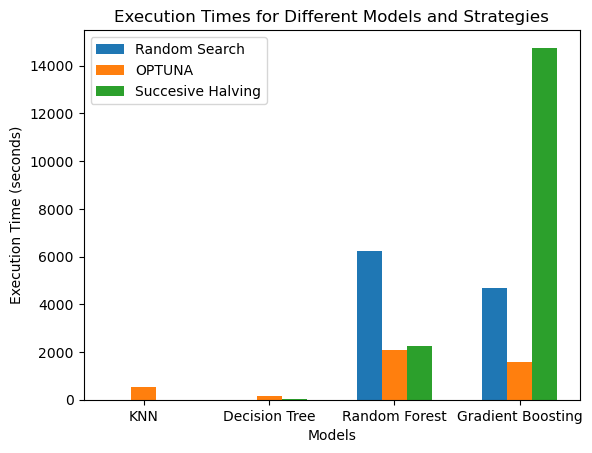

In [166]:
import matplotlib.pyplot as plt

models = ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
strategies = ['Random Search', 'OPTUNA', 'Succesive Halving']
execution_times = np.array([[1.38, 7.92, 6212.06, 4667.46],
                            [532.77, 138.56, 2096.44, 1570.39],
                            [1.92, 10.17, 2241.97, 14752.05]])

# Bar width
bar_width = 0.2

# Set up positions for bars
model_positions = np.arange(len(models))

# Create grouped bar plot
for i, strategy in enumerate(strategies):
    plt.bar(model_positions + i * bar_width, execution_times[i], width=bar_width, label=strategy)

# Replace numeric x-axis ticks with model names
plt.xticks(model_positions + (len(strategies) - 1) * bar_width / 2, models)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Times for Different Models and Strategies')

# Add legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

This results show that the execution time for Successive Halving is highly affected by the number of hyperparameter combinations that is going to be considered. For example, for KNN and Decision Trees, the nummer of posible combinations is lower and execution time is lower, but for Gradient Boosting, there is a larger number of cimbinations and the execution time is higher.

On the other hand, OPTUNA spends a lot of time for the simple models (KNN and Decision Tree) but does not increase that much the optimization time for more complex models (Random Forest and Gradient Boosting). This makes OPTUNA an adequate alternative when dealing with very complex models that have many hyperparameters to be tuned.

### 8.2. Training the final model

To conclude this study, the final model will be trained using the complete dataset. This training model could be used with the new dataset.
The model and the predictions will be stored in two files

In [26]:
# Define the final model (it is going to be the Random Forest)
final_model = best_forest

# Fit the whole data
X_data = wind_ava.drop('energy', axis=1)
y_data = wind_ava['energy']
final_model.fit(X_data,y_data)

Pipeline(steps=[('imputer', IterativeImputer(random_state=100515585)),
                ('regression',
                 RandomForestRegressor(max_depth=10, min_samples_split=4,
                                       n_estimators=180))])

In [27]:
import joblib

# Save model as a joblib file
joblib.dump(final_model, "final_model.joblib")

['final_model.joblib']

### 8.3. Predictions on the competition data

Once the model is already prepared for making predictions, the competition dataset is used to compute the predictions of the model. 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the data that is compressed as a gzip
wind_com = pd.read_csv('wind_competition.csv.gzip', compression="gzip")

# Display the first rows of the dataset just to see it
wind_com.head()

# Predict using the competition dataset
wind_com['timestamp'] = pd.to_datetime(wind_com[['year', 'month', 'day', 'hour']])
wind_com = wind_com.drop(columns=['timestamp'])

# Predict the energy production for the competition dataset
predictions = final_model.predict(wind_com)

np.savetxt('predictions.txt', predictions, delimiter='\n', fmt='%0.6f')


### 8.4. Confidence Intertvalas

It is interesting to have confidence intervals for the predictions, apart from the puntual predictions. This will be done using a similar model, but the loss function in the regressor will be in this case the quantile, and it will compute the lower quantile and the higher quantile. The best performance model is Random Forest, that in this case does not provide the possibility to compute the quantiles. So, the best performance Gradient Boosting method will be considered for this purpose, using its predictions only to compute the predictions of the model. 

For the sake of this study, a 90% confidence interval is considered, so the lower quantile will be the 5% quantile and the higher will be the 95% quantile. It is required to train the model again with these new models.

The result for these three predictions will be stored in three different files:
- punctual_pred.txt: for the predictions of the model
- 5quantile_pred.txt: for the lower bound interval predictions
- 95quantile_pred.txt: for the higher bound interval predictions 

In [39]:
# Define optimal hyperparameters
max_depth_opt_boosting = 4
min_samples_split_opt_boosting = 8
n_estimators_opt_boosting = 40
learning_rate_opt_boosting = 0.2
subsample_opt_boosting = 0.8


# Specify the quantiles
lower_quantile = 0.5
upper_quantile = 0.95

# Train a model for the lower quantile
lower_boosting = Pipeline([
    ('imputer',IterativeImputer(max_iter = 10, random_state = rs)),
    ('regression',GradientBoostingRegressor(loss='quantile', alpha=lower_quantile,random_state=rs,max_depth = max_depth_opt_boosting, min_samples_split = min_samples_split_opt_boosting, n_estimators = n_estimators_opt_boosting, learning_rate = learning_rate_opt_boosting, subsample = subsample_opt_boosting))])
lower_boosting.fit(X_data, y_data)

# Train a model for the upper quantile
upper_boosting = Pipeline([
    ('imputer',IterativeImputer(max_iter = 10, random_state = rs)),
    ('regression',GradientBoostingRegressor(loss='quantile', alpha=upper_quantile,random_state=rs,max_depth = max_depth_opt_boosting, min_samples_split = min_samples_split_opt_boosting, n_estimators = n_estimators_opt_boosting, learning_rate = learning_rate_opt_boosting, subsample = subsample_opt_boosting))])
upper_boosting.fit(X_data, y_data)

# Make predictions for the competition dataset
lower_prediction = lower_boosting.predict(wind_com)
upper_prediction = upper_boosting.predict(wind_com)

KeyboardInterrupt: 